In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# Data setup
data = {
    "Binary": ["mcf", "libquantum", "sphinx"],
    "LRU": {
        "IPC": [0.0837, 0.084609, 0.081527],
        "Miss Rate": [0.731356, 0.745534, 0.751898],
        "Misses": [11513, 16360, 2005],
    },
    "LRU8": {
        "IPC": [0.0837, 0.084609, 0.081527],
        "Miss Rate": [0.731356, 0.745534, 0.751898],
        "Misses": [11513, 16360, 2005],
    },
    "FIFO": {
        "IPC": [0.081679, 0.0084101, 0.080313],
        "Miss Rate": [0.770016, 0.767709, 0.786112],
        "Misses": [12137, 16842, 20958],
    },
    "MRU": {
        "IPC": [0.074695, 0.076899, 0.074310],
        "Miss Rate": [0.7966029, 0.969673, 0.966143],
        "Misses": [15299, 21135, 25768],
    },
}

In [26]:
flattened_data = []
for binary in data["Binary"]:
    for policy, metrics in data.items():
        if policy != "Binary":
            flattened_data.append({
                "Binary": binary,
                "Policy": policy,
                "IPC": metrics["IPC"][data["Binary"].index(binary)],
                "Miss Rate": metrics["Miss Rate"][data["Binary"].index(binary)],
                "Misses": metrics["Misses"][data["Binary"].index(binary)],
            })

In [27]:
df = pd.DataFrame(flattened_data)

In [28]:
# Split DataFrame by Binary
binaries = df["Binary"].unique()
dfs = {binary: df[df["Binary"] == binary] for binary in binaries}

In [29]:
dfs

{'mcf':   Binary Policy       IPC  Miss Rate  Misses
 0    mcf    LRU  0.083700   0.731356   11513
 1    mcf   LRU8  0.083700   0.731356   11513
 2    mcf   FIFO  0.081679   0.770016   12137
 3    mcf    MRU  0.074695   0.796603   15299,
 'libquantum':        Binary Policy       IPC  Miss Rate  Misses
 4  libquantum    LRU  0.084609   0.745534   16360
 5  libquantum   LRU8  0.084609   0.745534   16360
 6  libquantum   FIFO  0.008410   0.767709   16842
 7  libquantum    MRU  0.076899   0.969673   21135,
 'sphinx':     Binary Policy       IPC  Miss Rate  Misses
 8   sphinx    LRU  0.081527   0.751898    2005
 9   sphinx   LRU8  0.081527   0.751898    2005
 10  sphinx   FIFO  0.080313   0.786112   20958
 11  sphinx    MRU  0.074310   0.966143   25768}

In [30]:
df

,Binary,Policy,IPC,Miss Rate,Misses
0,mcf,LRU,0.083700,0.731356,11513
1,mcf,LRU8,0.083700,0.731356,11513
2,mcf,FIFO,0.081679,0.770016,12137
3,mcf,MRU,0.074695,0.796603,15299
4,libquantum,LRU,0.084609,0.745534,16360
5,libquantum,LRU8,0.084609,0.745534,16360
6,libquantum,FIFO,0.008410,0.767709,16842
7,libquantum,MRU,0.076899,0.969673,21135
8,sphinx,LRU,0.081527,0.751898,2005
9,sphinx,LRU8,0.081527,0.751898,2005


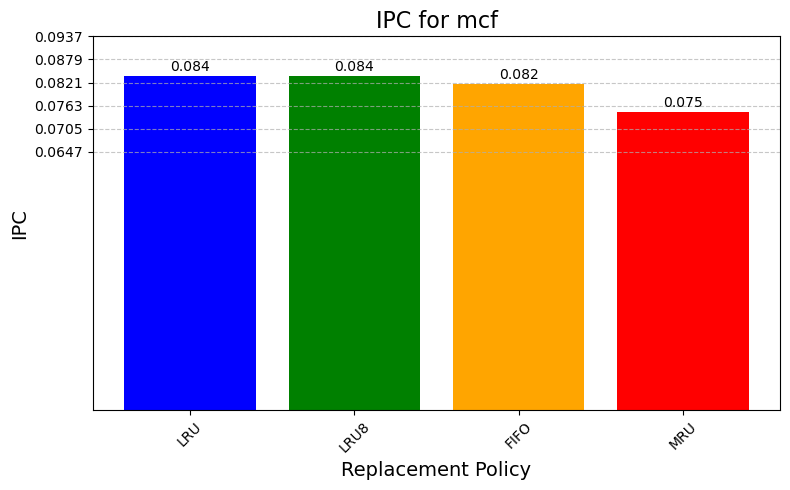

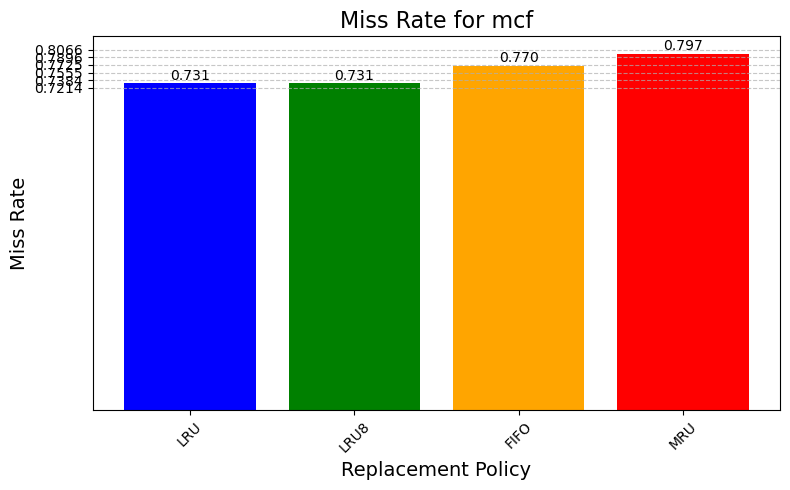

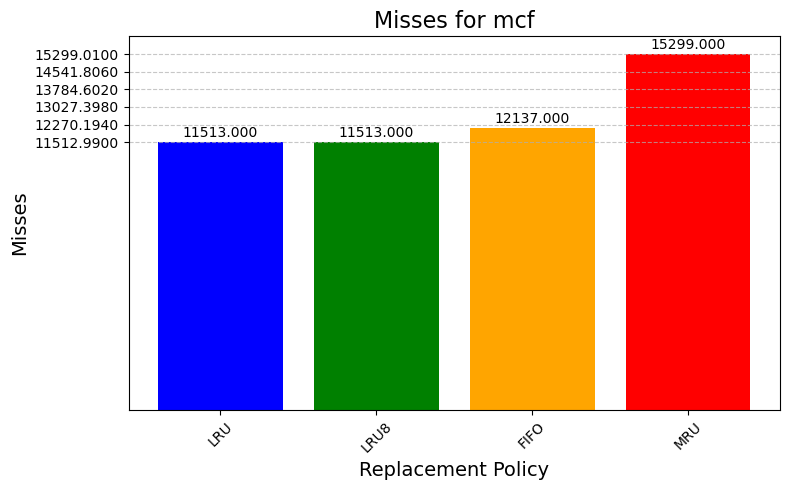

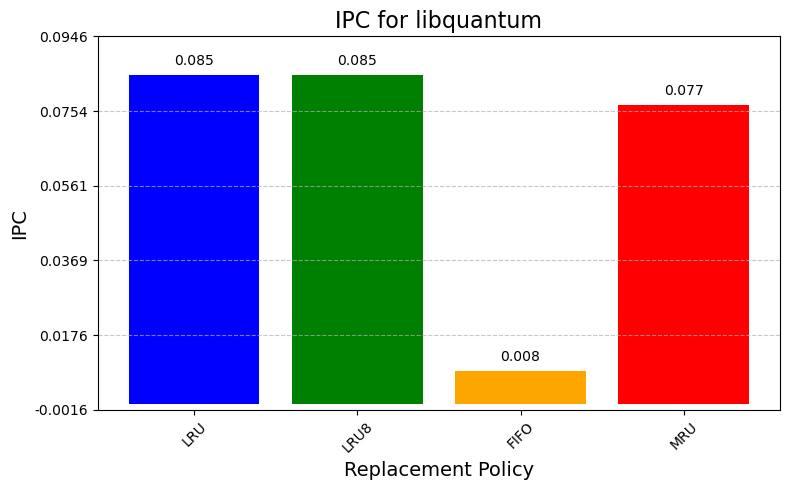

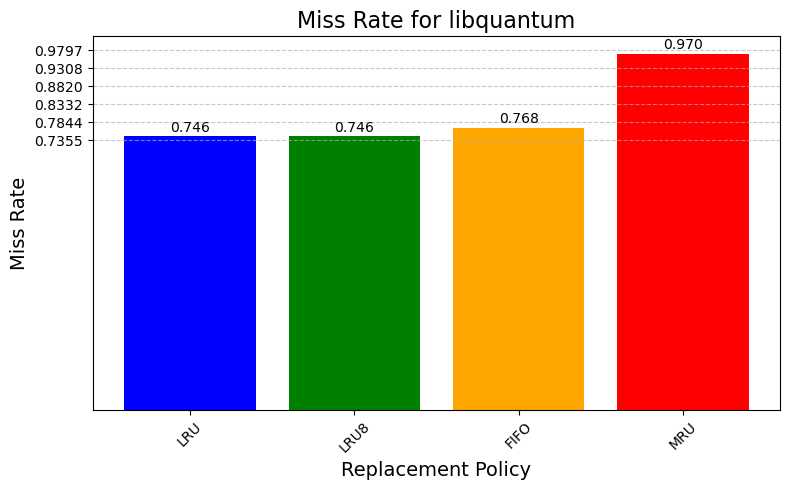

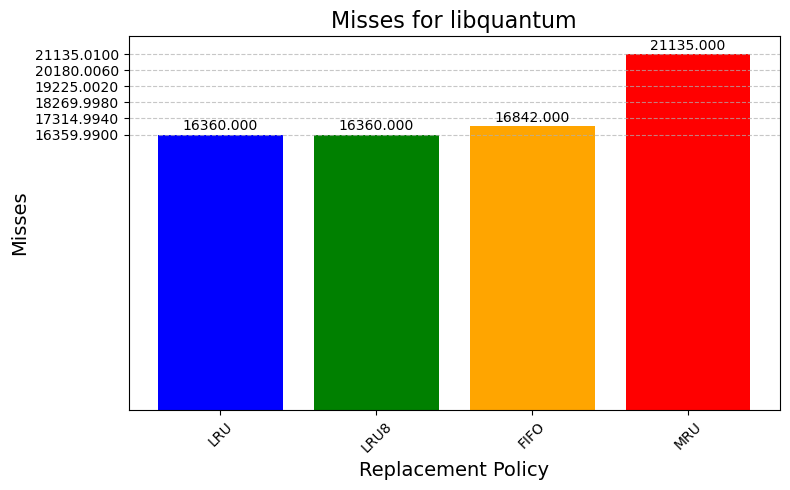

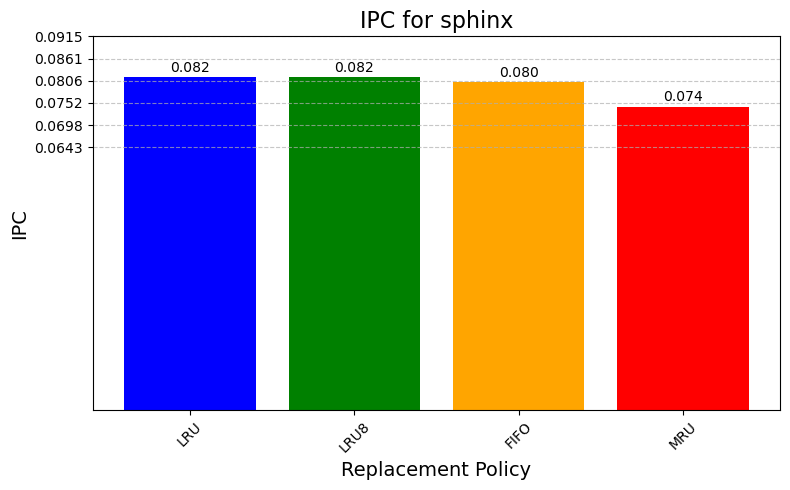

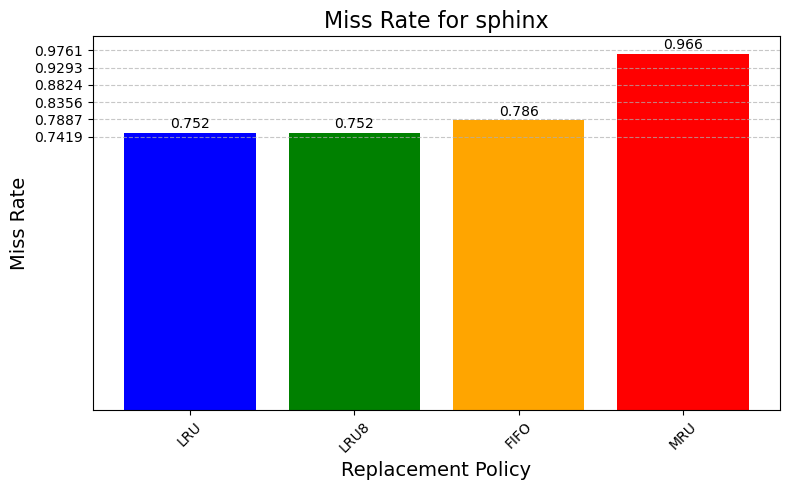

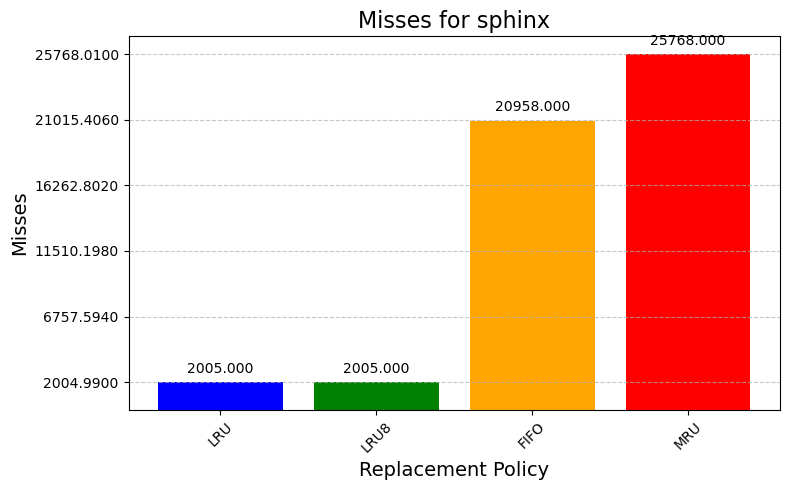

In [32]:
def plot_metrics(df, binary):
    metrics = ["IPC", "Miss Rate", "Misses"]
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        
        bars = plt.bar(df["Policy"], df[metric], color=["blue", "green", "orange", "red"])
        
        y_min, y_max = min(df[metric]) - 0.01, max(df[metric]) + 0.01  # Add padding
        y_ticks = np.linspace(y_min, y_max, num=6)  # 6 evenly spaced ticks
        plt.yticks(y_ticks, [f"{tick:.4f}" for tick in y_ticks])  # Format to 4 decimal places
        
        for bar, value in zip(bars, df[metric]):
            plt.text(
                bar.get_x() + bar.get_width() / 2,  
                bar.get_height() + (y_max - y_min) * 0.02,  
                f"{value:.3f}",  
                ha="center", va="bottom", fontsize=10, color="black"
            )
        
        plt.title(f"{metric} for {binary}", fontsize=16)
        plt.xlabel("Replacement Policy", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        
        plt.tight_layout()
        plt.show()
        
for binary, binary_df in dfs.items():
    plot_metrics(binary_df, binary)